In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.shape

(4177, 9)

In [4]:
df.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
dtype: bool

In [5]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
df.info

<bound method DataFrame.info of      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.141

In [7]:
(df.Height==0).sum()

2

In [8]:
df[df['Height']==0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [9]:
mean=pd.pivot_table(df,index=['Sex'],aggfunc={"Height":np.mean})
mean

,Height
Sex,
F,0.158011
I,0.107996
M,0.151381


In [10]:
df['Height']=df['Height'].replace(to_replace=0,value=0.01079996)

In [11]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139522,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041810,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## split the dataset

In [12]:
df['Age']=df['Rings']+1.5
df=df.drop("Rings",axis=1)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [13]:
train,test=train_test_split(df,test_size=0.30,random_state=42)
print("Length of Train: ",len(train))
print("Length of Train: ",len(test))

Length of Train:  2923
Length of Train:  1254


In [14]:
nf = df.select_dtypes(include=[np.number]).columns
cf = df.select_dtypes(include=[np.object]).columns
cf

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_2740\2912496439.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cf = df.select_dtypes(include=[np.object]).columns


Index(['Sex'], dtype='object')

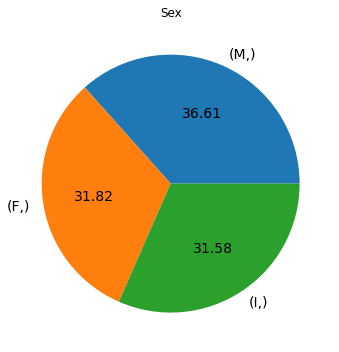

In [15]:
# Exploratory Data Analysis
ja=train[cf].value_counts(normalize=True)
ja.plot(kind='pie',
       figsize=(5,5),
       title=cf.item(),
       ylabel="",
       autopct='%.2f',
       fontsize=14)
plt.tight_layout()
plt.show()

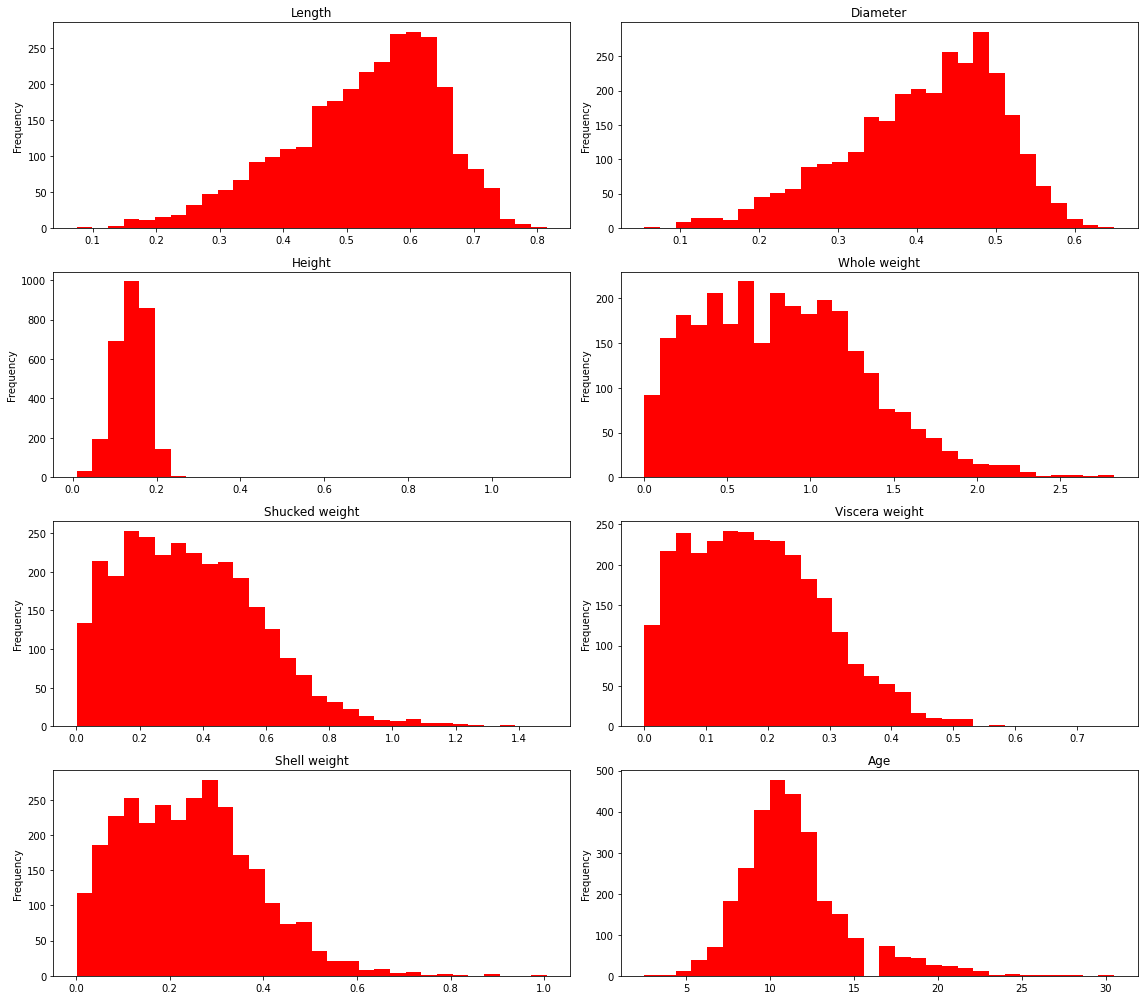

In [16]:
fig, axes=plt.subplots(4,2,figsize=(16,14))
axes=np.ravel(axes)
for i,c in enumerate(nf):
    hist=train[c].plot(kind='hist',ax=axes[i],title=c,color='red',bins=30)
plt.tight_layout()
plt.show()

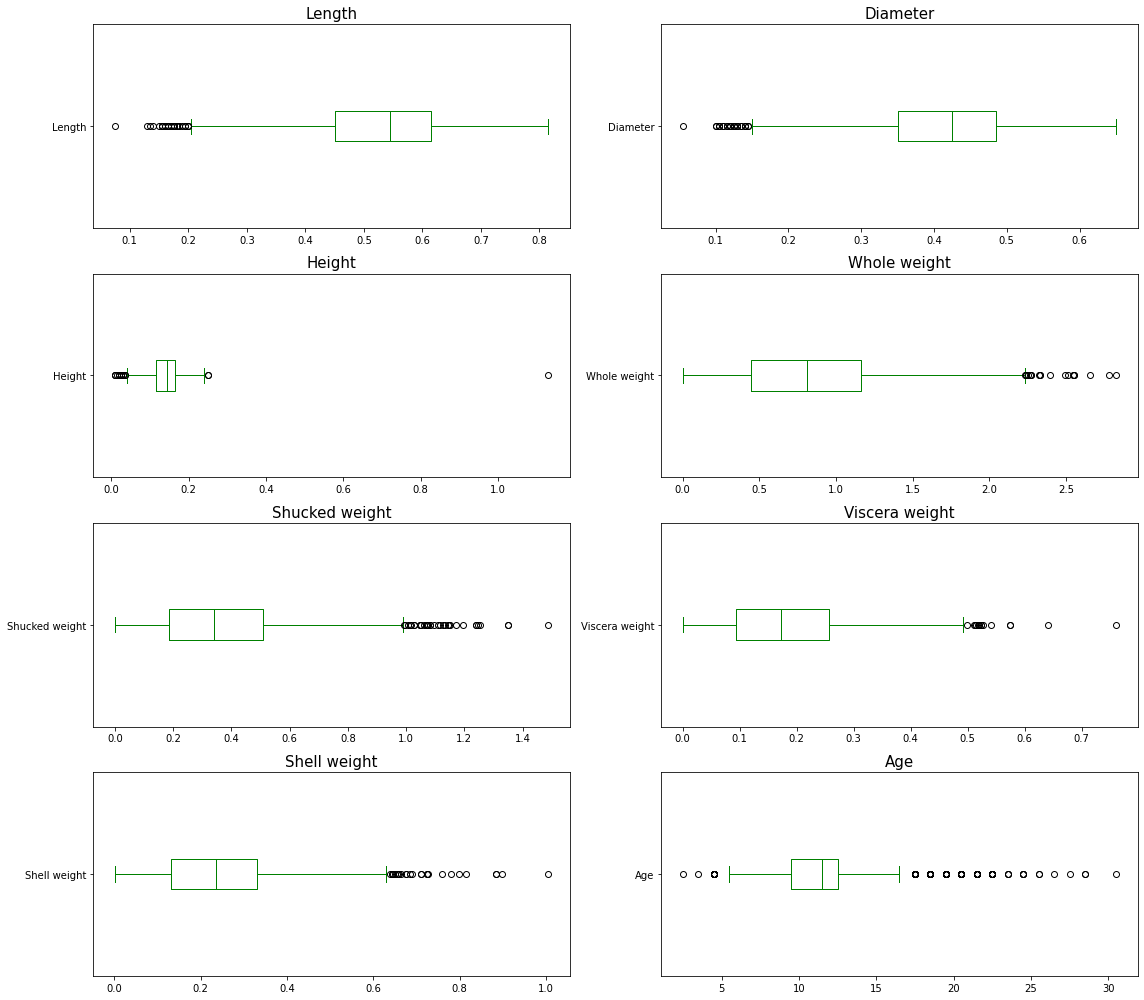

In [17]:
fig, axes=plt.subplots(4,2,figsize=(16,14))
axes=np.ravel(axes)
for i,c in enumerate(nf):
    hist=train[c].plot(kind='box',ax=axes[i],title=c,color='green',vert=False)
    axes[i].set_title(c,fontsize=15)
plt.tight_layout()
plt.show()

In [18]:
target = df.iloc[:,-1:].columns

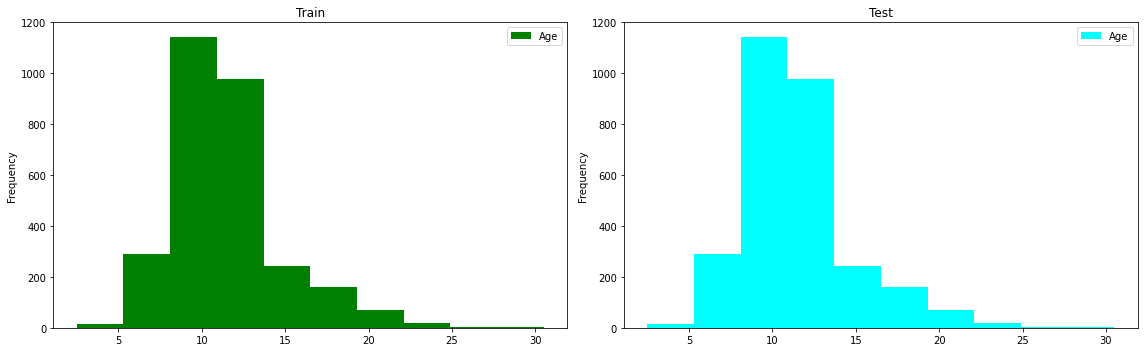

In [19]:
fig, axes=plt.subplots(ncols=2,figsize=(16,5))
axes=np.ravel(axes)
train[target].plot.hist(color='green',ax=axes[0])
axes[0].set(title='Train')
train[target].plot.hist(color='cyan',ax=axes[1])
axes[1].set(title='Test')
plt.tight_layout()
plt.show()

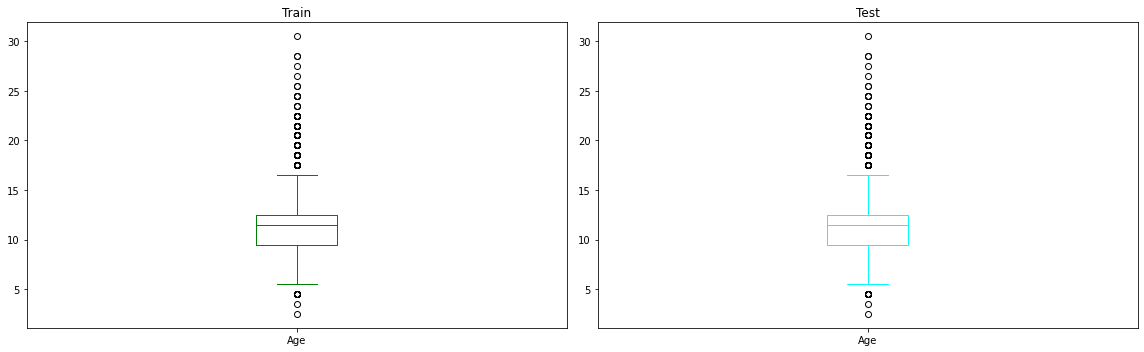

In [20]:
  # check the outliers
fig, axes=plt.subplots(ncols=2,figsize=(16,5))
axes=np.ravel(axes)
train[target].plot(kind='box', color='green',ax=axes[0])
axes[0].set(title='Train')
train[target].plot(kind='box', color='cyan',ax=axes[1])
axes[1].set(title='Test')
plt.tight_layout()
plt.show()

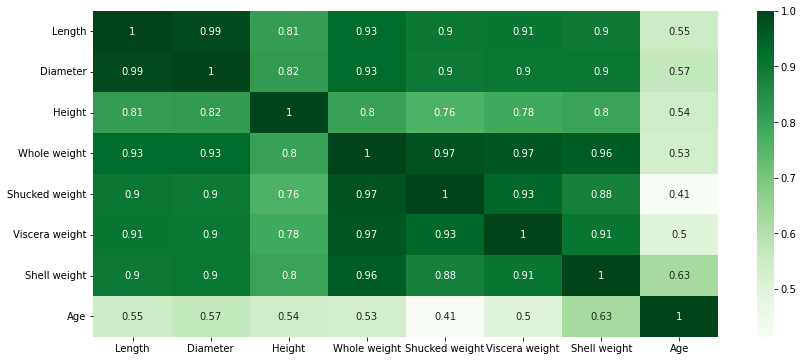

In [21]:
plt.figure(figsize=(14,6))
sns.heatmap(train.corr(method='pearson'),annot=True, cbar=True,cmap='Greens')
plt.show()

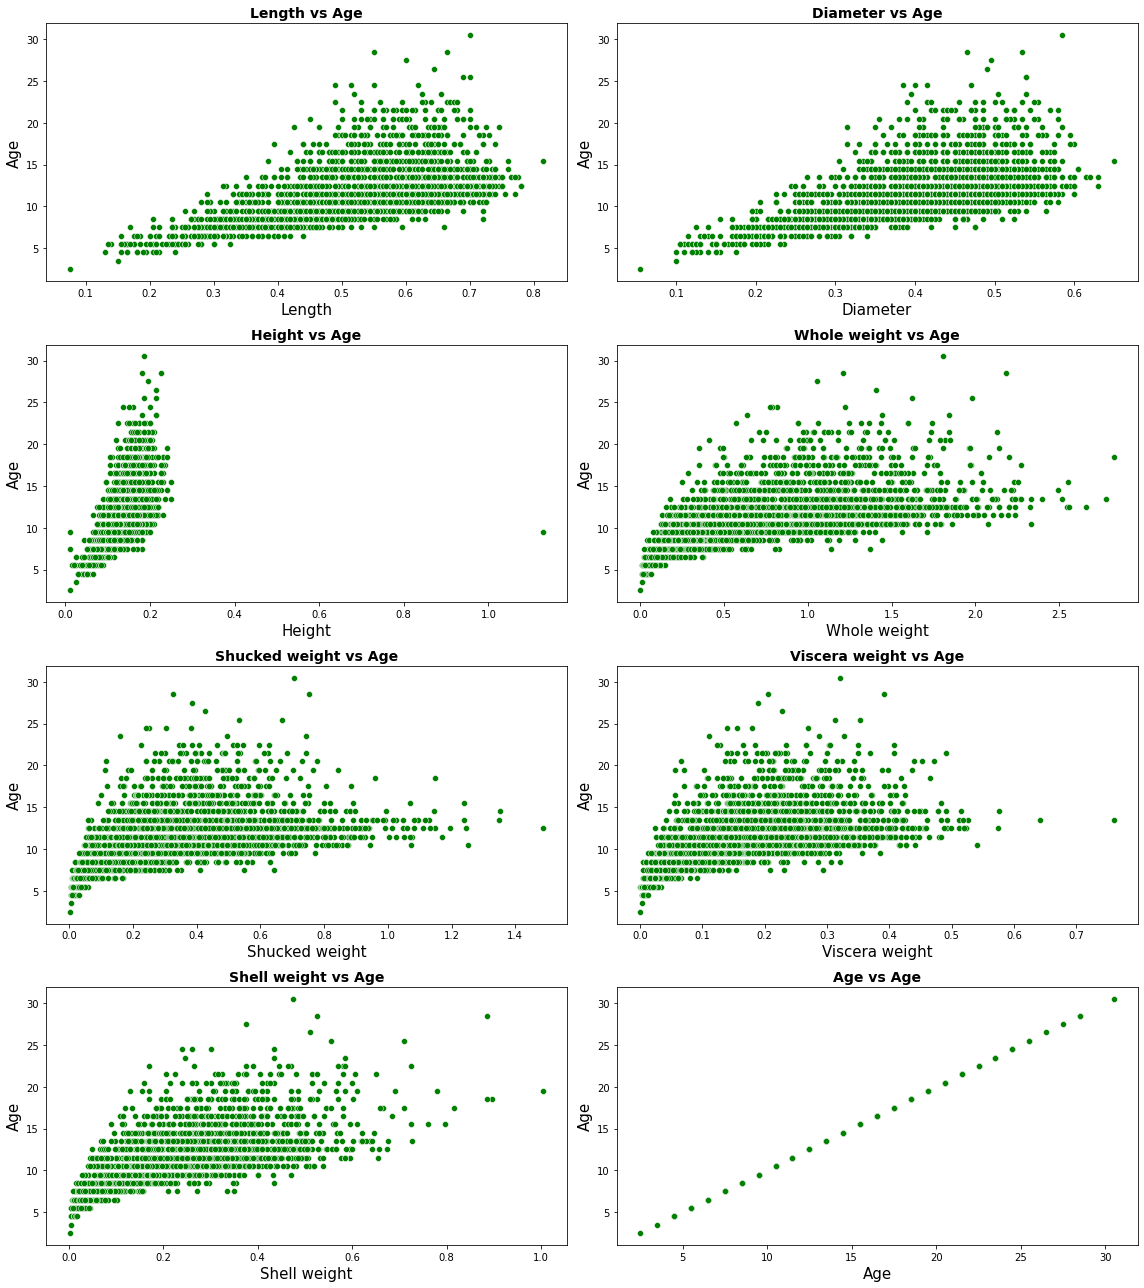

In [22]:
fig, axes=plt.subplots(4,2,figsize=(16,18))
axes=np.ravel(axes)
for i,c in enumerate(nf):
    _ =sns.scatterplot(x=train[c],y=train[target[0]],ax=axes[i],color='green')
    axes[i].set_title(f"{c} vs Age",fontsize=14,fontweight='bold')
    axes[i].set_xlabel(c,fontsize=15)
    axes[i].set_ylabel('Age',fontsize=15)
plt.tight_layout()
plt.show()

In [23]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [24]:
train.shape,test.shape

((2923, 11), (1254, 11))

In [25]:
train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Sex_F,Sex_I,Sex_M
2830,0.525,0.430,0.135,0.8435,0.4325,0.1800,0.1815,10.5,1,0,0
925,0.430,0.325,0.100,0.3645,0.1575,0.0825,0.1050,8.5,0,1,0
3845,0.455,0.350,0.105,0.4160,0.1625,0.0970,0.1450,12.5,0,0,1
547,0.205,0.155,0.045,0.0425,0.0170,0.0055,0.0155,8.5,0,0,1
2259,0.590,0.465,0.160,1.1005,0.5060,0.2525,0.2950,14.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3444,0.490,0.400,0.115,0.5690,0.2560,0.1325,0.1450,10.5,1,0,0
466,0.670,0.550,0.190,1.3905,0.5425,0.3035,0.4000,13.5,1,0,0
3092,0.510,0.395,0.125,0.5805,0.2440,0.1335,0.1880,12.5,0,0,1
3772,0.575,0.465,0.120,1.0535,0.5160,0.2185,0.2350,10.5,0,0,1


In [26]:
X_train=train.drop('Age',axis=1)
y_train=train["Age"]
X_test=test.drop('Age',axis=1)
y_test=test["Age"]

In [27]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((2923, 10), (2923,), (1254, 10), (1254,))

In [28]:
pipe_lr=make_pipeline(MinMaxScaler(),LinearRegression())
params_lr={'linearregression__fit_intercept':['True','False']}
grid_lr=GridSearchCV(pipe_lr,param_grid=params_lr,cv=5)

In [29]:
grid_lr.fit(X_train,y_train)
grid_lr.best_estimator_

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('linearregression', LinearRegression(fit_intercept='True'))])

In [30]:

print('Set Training Score {:.3f}'.format(grid_lr.score(X_train,y_train)))
print('Set Testing Score {:.3f}'.format(grid_lr.score(X_test,y_test)))

Set Training Score 0.540
Set Testing Score 0.529


In [31]:
yp=grid_lr.predict(X_test)
ns=round(mean_squared_error(y_test,yp),3)
print('Mean squared error linear regression with out target tranformation is :',ns)

Mean squared error linear regression with out target tranformation is : 4.783


In [32]:
ppl=make_pipeline(MinMaxScaler(),LinearRegression(fit_intercept=True))
rtr=TransformedTargetRegressor(regressor=ppl,func=np.sqrt,inverse_func=np.square)

In [33]:
rtr.fit(X_train,y_train)
yp=rtr.predict(X_test)

In [34]:
print('Set Training Score {:.3f}'.format(rtr.score(X_train,y_train)))
print('Set Testing Score {:.3f}'.format(rtr.score(X_test,y_test)))

Set Training Score 0.530
Set Testing Score 0.533


In [35]:
mtr=round(mean_squared_error(y_test,yp),3)
print('Mean squared error linear regression with target tranformation is :',mtr)

Mean squared error linear regression with target tranformation is : 4.743


In [36]:
# knn algorithm
pk=make_pipeline(MinMaxScaler(),KNeighborsRegressor())
pkn={'kneighborsregressor__n_neighbors':list(range(1,5))}
gk=GridSearchCV(pk,param_grid=pkn,cv=5)

In [37]:
gk.fit(X_train,y_train)
gk.best_estimator_

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=4))])

In [38]:
print('Set Training Score {:.3f}'.format(gk.score(X_train,y_train)))
print('Set Testing Score {:.3f}'.format(gk.score(X_test,y_test)))

Set Training Score 0.696
Set Testing Score 0.477


In [39]:
yp=gk.predict(X_test)
mkn=round(mean_squared_error(y_test,yp),3)
print('Mean squared error KNN regression with out target tranformation is :',mkn)

Mean squared error KNN regression with out target tranformation is : 5.308


In [40]:
pk=make_pipeline(MinMaxScaler(),KNeighborsRegressor(n_neighbors=16))
rtk=TransformedTargetRegressor(regressor=pk,func=np.sqrt,inverse_func=np.square)

In [41]:
rtk.fit(X_train,y_train)
yp=rtk.predict(X_test)

In [42]:
print('Set Training Score {:.3f}'.format(rtk.score(X_train,y_train)))
print('Set Testing Score {:.3f}'.format(rtk.score(X_test,y_test)))

Set Training Score 0.578
Set Testing Score 0.526


In [43]:
mtr=round(mean_squared_error(y_test,yp),3)
print('Mean squared error KNN regression with target tranformation is :',mtr)

Mean squared error KNN regression with target tranformation is : 4.811


In [44]:
# Decision Tree Regression
dt=DecisionTreeRegressor(random_state=42)
dt=dt.fit(X_train,y_train)
dt.tree_.node_count,dt.tree_.max_depth

(3455, 25)

In [45]:
pt={'max_depth':range(1,dt.tree_.max_depth+1,2),'max_features':range(1,len(dt.feature_importances_)+1)}

In [46]:
gr=GridSearchCV(DecisionTreeRegressor(random_state=42),param_grid=pt)
gr.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': range(1, 26, 2),
                         'max_features': range(1, 11)})

In [47]:
print('Set Training Score {:.3f}'.format(gr.score(X_train,y_train)))
print('Set Testing Score {:.3f}'.format(gr.score(X_test,y_test)))

Set Training Score 0.551
Set Testing Score 0.457


In [48]:
yp=gr.predict(X_test)
mkn=round(mean_squared_error(y_test,yp),3)
print('Mean squared error Decision Tree with out target tranformation is :',mkn)

Mean squared error Decision Tree with out target tranformation is : 5.516


In [49]:
# Decision Tree with target transformation
dt=DecisionTreeRegressor(random_state=42,max_depth=5,max_features=8)
rtr=TransformedTargetRegressor(regressor=dt,func=np.sqrt,inverse_func=np.square)
rtr.fit(X_train,y_train)
yp=rtr.predict(X_test)

In [50]:
print('Set Training Score {:.3f}'.format(rtr.score(X_train,y_train)))
print('Set Testing Score {:.3f}'.format(rtr.score(X_test,y_test)))

Set Training Score 0.546
Set Testing Score 0.462


In [51]:
mkn=round(mean_squared_error(y_test,yp),3)
print('Mean squared error Decision Tree with target tranformation is :',mkn)

Mean squared error Decision Tree with target tranformation is : 5.463


In [52]:
#svm
pp=make_pipeline(MinMaxScaler(),SVR())
par={'svr__gamma':['scale','auto'],'svr__C':[0,0.01,0.1,1,10,100]}
gr=GridSearchCV(pp,param_grid=par,cv=5)


In [53]:
gr.fit(X_train,y_train)
gr.best_estimator_

C:\Users\ELCOT\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ELCOT\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ELCOT\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\ELCOT\AppData\Local\Programs\Python\Python39\lib\site-p

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('svr', SVR(C=100))])

In [54]:
print('Set Training Score {:.3f}'.format(gr.score(X_train,y_train)))
print('Set Testing Score {:.3f}'.format(gr.score(X_test,y_test)))

Set Training Score 0.588
Set Testing Score 0.554


In [55]:
yp=gr.predict(X_test)
mkn=round(mean_squared_error(y_test,yp),3)
print('Mean squared error Decision Tree with out target tranformation is :',mkn)

Mean squared error Decision Tree with out target tranformation is : 4.526


In [56]:
# svm with target information
dt=make_pipeline(MinMaxScaler(),SVR(C=100))
rtr=TransformedTargetRegressor(regressor=dt,func=np.sqrt,inverse_func=np.square)
rtr.fit(X_train,y_train)
yp=rtr.predict(X_test)

In [57]:
print('Set Training Score {:.3f}'.format(rtr.score(X_train,y_train)))
print('Set Testing Score {:.3f}'.format(rtr.score(X_test,y_test)))

Set Training Score 0.597
Set Testing Score 0.551


In [58]:
mkn=round(mean_squared_error(y_test,yp),3)
print('Mean squared error Decision Tree with out target tranformation is :',mkn)

Mean squared error Decision Tree with out target tranformation is : 4.557
